In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Visualizing the data

In [73]:
FILE_NAME = "PQ2MON - Orders - Weeks -1 to -109 (1).xls.xlsx"
DF = pd.read_excel(FILE_NAME)
DF

,Client Grouping1,Customer Group,Requested Mode,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Lane ID - City to City,Start Date,Completion Date,Order #,Avg. Weekly Frequency
0,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-04-16,2019-04-18,3790088,0
1,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-05-07,2019-05-09,3810953,0
2,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-06-07,2019-06-10,3841144,0
3,Corporate,3M Canada Company,ROAD,Standard,DRY,ON2TOR,PQ2S,"MILTON,ON/ to DRUMMONDVILLE,PQ/",2019-07-09,2019-07-11,3869973,0
4,Corporate,3M Canada Company,ROAD,Standard,DRY,PQ2MON,USMWIA,"STE THERESE,PQ/TE to PRAIRIE DU CHIEN,WI/",2020-02-26,2020-03-02,4066936,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23864,Spot,Traffic Tech,ROAD,Standard,DRY,PQ2MON,BC2VAN,"ST LAURENT,PQ/IL to DELTA,BC/",2020-06-18,2020-06-22,4192727,0
23865,Spot,Traffic Tech,ROAD,Standard,REEFER,PQ2MON,ABNEDM,"BOUCHERVILLE,PQ/ to EDMONTON,AB/",2020-02-12,2020-02-18,4074001,0
23866,Spot,Traffic Tech,ROAD,Standard,REEFER,PQ2MON,ABNEDM,"BOUCHERVILLE,PQ/ to EDMONTON,AB/",2020-02-12,2020-02-20,4073978,0
23867,Spot,Traffic Tech,ROAD,Standard,REEFER,PQ2MON,ABNEDM,"BOUCHERVILLE,PQ/ to EDMONTON,AB/",2020-02-13,2020-02-18,4074019,0


In [148]:
from collections import Counter

def getSortedCounter(my_list,cut_off=5,desc=True,others=True):
    c = dict(sorted(Counter(my_list).items(), key=lambda x: x[1], reverse = desc))
    if cut_off and cut_off < len(c):
        others_cnt = sum(list(c.values())[cut_off:])
        c = dict(list(c.items())[:cut_off])
        if others:
            c["Others"] = others_cnt
    return c

def getSortedCounterDf(df,col,cut_off=5):
    c = getSortedCounter(df[col],cut_off=cut_off)
    df = pd.DataFrame(columns=[col,"count"])
    df[col] = [str(key) for key in c.keys()]
    df["count"] = c.values()
    return df

def sorted_bar_plot(df,col,cut_off=5):
    df_cnt = getSortedCounterDf(df,col,cut_off)
    sns.barplot(data=df_cnt,y=col,x="count")
    plt.show()


def pie_plot(my_list):
    c = getCounter(my_list,desc=True)
    labels = c.keys()
    sizes = [i/len(my_list) for i in c.values()]
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,counterclock = False)
    ax1.axis('equal')
    plt.show()
    

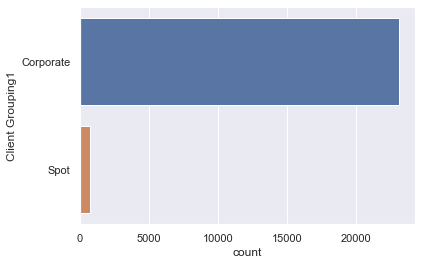

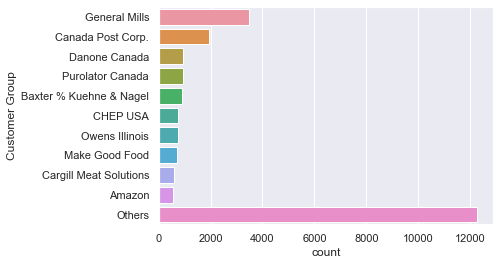

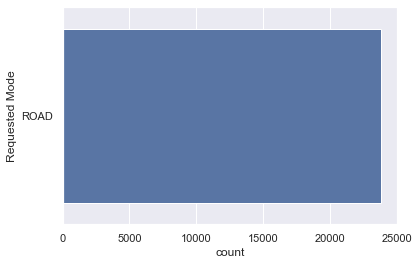

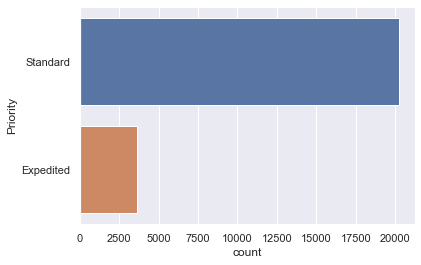

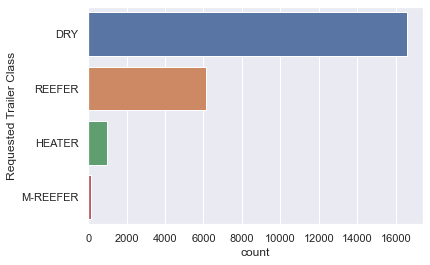

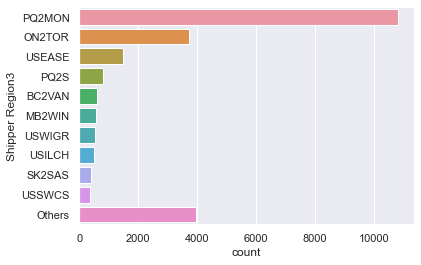

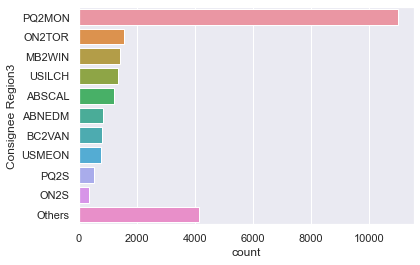

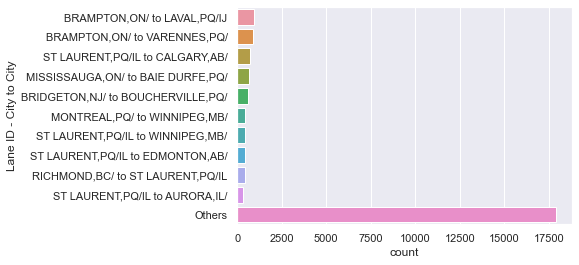

In [149]:
for col in DF.columns[:-4]:
    sorted_bar_plot(DF,col,10)

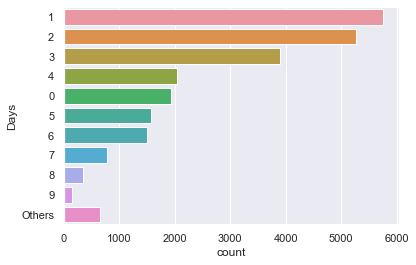

In [142]:
df = DF['Completion Date'] - DF['Start Date']
df = pd.DataFrame([item.days for item in df],columns=["Days"])
bar_plot(df,"Days",10)

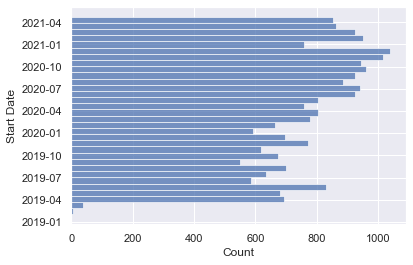

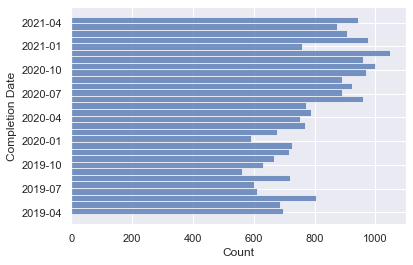

In [216]:
col = DF["Start Date"]
sns.histplot(data=DF,y=col)
plt.show()
col = DF["Completion Date"]
sns.histplot(data=DF,y=col)
plt.show()

In [225]:
start_dates = dict(sorted(Counter(DF['Start Date']).items(), key=lambda x: x[0]))
start_dates

completion_dates = dict(sorted(Counter(DF['Completion Date']).items(), key=lambda x: x[0]))
completion_dates

deltas = dict()
keys = set(start_dates.keys()) | set(completion_dates.keys())
for key in keys:
    cnt1 = 0 if key not in start_dates.keys() else start_dates[key]
    cnt2 = 0 if key not in completion_dates.keys() else completion_dates[key]
    deltas[key] = cnt2 - cnt1

deltas = dict(sorted(deltas.items(), key=lambda x: x[0]))
deltas

{Timestamp('2019-01-31 00:00:00'): 1,
 Timestamp('2019-02-01 00:00:00'): 1,
 Timestamp('2019-02-04 00:00:00'): 3,
 Timestamp('2019-03-13 00:00:00'): 2,
 Timestamp('2019-03-19 00:00:00'): 5,
 Timestamp('2019-03-20 00:00:00'): 4,
 Timestamp('2019-03-21 00:00:00'): 8,
 Timestamp('2019-03-22 00:00:00'): 21,
 Timestamp('2019-03-23 00:00:00'): 9,
 Timestamp('2019-03-24 00:00:00'): 9,
 Timestamp('2019-03-25 00:00:00'): 31,
 Timestamp('2019-03-26 00:00:00'): 32,
 Timestamp('2019-03-27 00:00:00'): 35,
 Timestamp('2019-03-28 00:00:00'): 32,
 Timestamp('2019-03-29 00:00:00'): 32,
 Timestamp('2019-03-30 00:00:00'): 10,
 Timestamp('2019-03-31 00:00:00'): 5,
 Timestamp('2019-04-01 00:00:00'): 33,
 Timestamp('2019-04-02 00:00:00'): 28,
 Timestamp('2019-04-03 00:00:00'): 28,
 Timestamp('2019-04-04 00:00:00'): 44,
 Timestamp('2019-04-05 00:00:00'): 39,
 Timestamp('2019-04-06 00:00:00'): 9,
 Timestamp('2019-04-07 00:00:00'): 7,
 Timestamp('2019-04-08 00:00:00'): 19,
 Timestamp('2019-04-09 00:00:00'): 36

# Preprocessing the Data

In [242]:
REGIONS = ['PQ2MON','PQ2N','PQ2OTT','PQ2QUE','PQ2S','PQ2C']
df = DF.copy()
for i in range(len(df)):
    df.loc[i,"PQ"] = (df.loc[i,"Shipper Region3"] in REGIONS) or (df.loc[i,"Consignee Region3"] in REGIONS)

df = df[df["PQ"]==True].drop(columns=["PQ","Customer Group","Requested Mode","Order #","Avg. Weekly Frequency","Lane ID - City to City","Client Grouping1"])
df

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
0,Standard,DRY,ON2TOR,PQ2S,2019-04-16,2019-04-18
1,Standard,DRY,ON2TOR,PQ2S,2019-05-07,2019-05-09
2,Standard,DRY,ON2TOR,PQ2S,2019-06-07,2019-06-10
3,Standard,DRY,ON2TOR,PQ2S,2019-07-09,2019-07-11
4,Standard,DRY,PQ2MON,USMWIA,2020-02-26,2020-03-02
...,...,...,...,...,...,...
23864,Standard,DRY,PQ2MON,BC2VAN,2020-06-18,2020-06-22
23865,Standard,REEFER,PQ2MON,ABNEDM,2020-02-12,2020-02-18
23866,Standard,REEFER,PQ2MON,ABNEDM,2020-02-12,2020-02-20
23867,Standard,REEFER,PQ2MON,ABNEDM,2020-02-13,2020-02-18


In [251]:
REGIONS = ['PQ2MON','PQ2N','PQ2OTT','PQ2QUE','PQ2S','PQ2C']
df = DF.copy()
for i in range(len(df)):
    df.loc[i,"PQ"] = (df.loc[i,"Shipper Region3"] in REGIONS) or (df.loc[i,"Consignee Region3"] in REGIONS)
    
df = df[df["PQ"]==False]


In [252]:
df

,Client Grouping1,Customer Group,Requested Mode,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Lane ID - City to City,Start Date,Completion Date,Order #,Avg. Weekly Frequency,PQ
48,Corporate,3M Canada Company,ROAD,Standard,DRY,USEANE,MB2SE,"WILLSBORO,NY/ to MORDEN,MB/",2019-04-16,2019-04-19,3788876,0,False
49,Corporate,3M Canada Company,ROAD,Standard,DRY,USEANE,MB2SE,"WILLSBORO,NY/ to MORDEN,MB/",2019-05-06,2019-05-11,3805418,0,False
50,Corporate,3M Canada Company,ROAD,Standard,DRY,USMNMI,ATLCIS,"COTTAGE GROVE,MN/ to MOUNT PEARL,NF/",2020-11-11,2020-11-17,4343164,0,False
51,Corporate,3M Canada Company,ROAD,Standard,DRY,USMNMI,ATLCIS,"COTTAGE GROVE,MN/ to MOUNT PEARL,NF/",2021-01-28,2021-02-11,4418272,0,False
77,Corporate,3M Canada Company,ROAD,Standard,DRY,USWIGR,ATLCML,"WRIGHTSTOWN,WI/ to DIEPPE,NB/",2019-08-28,2019-09-03,3917269,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23850,Spot,Traffic Tech,ROAD,Expedited,DRY,NaN,MB2WIN,"POINTE CLAIRE,PQ/ to WINNIPEG,MB/",2020-08-18,2020-08-20,4216829,0,False
23851,Spot,Traffic Tech,ROAD,Expedited,DRY,NaN,MB2WIN,"POINTE CLAIRE,PQ/ to WINNIPEG,MB/",2020-09-01,2020-09-03,4256100,0,False
23852,Spot,Traffic Tech,ROAD,Expedited,DRY,NaN,MB2WIN,"POINTE CLAIRE,PQ/ to WINNIPEG,MB/",2020-10-13,2020-10-15,4282566,0,False
23853,Spot,Traffic Tech,ROAD,Expedited,DRY,NaN,MB2WIN,"POINTE CLAIRE,PQ/ to WINNIPEG,MB/",2020-10-27,2020-10-29,4282569,0,False


In [247]:
DF_PQ2MON = df[df["Shipper Region3"]=="PQ2MON"].append(df[df["Consignee Region3"]=="PQ2MON"]).drop_duplicates(keep='first')
DF_PQ2N = df[df["Shipper Region3"]=="PQ2N"].append(df[df["Consignee Region3"]=="PQ2N"]).drop_duplicates(keep='first')
DF_PQ2OTT = df[df["Shipper Region3"]=="PQ2OTT"].append(df[df["Consignee Region3"]=="PQ2OTT"]).drop_duplicates(keep='first')
DF_PQ2QUE = df[df["Shipper Region3"]=="PQ2QUE"].append(df[df["Consignee Region3"]=="PQ2QUE"]).drop_duplicates(keep='first')
DF_PQ2S = df[df["Shipper Region3"]=="PQ2S"].append(df[df["Consignee Region3"]=="PQ2S"]).drop_duplicates(keep='first')
DF_PQ2C = df[df["Shipper Region3"]=="PQ2C"].append(df[df["Consignee Region3"]=="PQ2C"]).drop_duplicates(keep='first')

In [250]:
DF_PQ2S

,Priority,Requested Trailer Class,Shipper Region3,Consignee Region3,Start Date,Completion Date
45,Standard,DRY,PQ2S,USMWMO,2019-10-23,2019-10-28
46,Standard,DRY,PQ2S,USMWMO,2020-01-10,2020-01-13
47,Standard,DRY,PQ2S,USMWMO,2020-03-25,2020-03-30
196,Expedited,DRY,PQ2S,PQ2OTT,2020-05-08,2020-05-09
349,Standard,DRY,PQ2S,ON2TOR,2019-11-08,2019-11-10
...,...,...,...,...,...,...
20222,Standard,REEFER,PQ2MON,PQ2S,2021-02-11,2021-02-12
20223,Standard,REEFER,PQ2MON,PQ2S,2021-03-10,2021-03-11
20224,Standard,REEFER,PQ2MON,PQ2S,2021-03-17,2021-03-18
20225,Standard,REEFER,PQ2MON,PQ2S,2021-03-22,2021-03-23
